# Fundamentals of Data Analysis Project 2019

Peter McGowan
G00190832

Placeholder: images and intro

In [1]:
# Import pandas for managing data
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the tips dataset and create a dataframe from it

In [2]:
# load the tips dataset from Seaborn
tips = sns.load_dataset("tips")

In [3]:
# Create a dataframe from the tips dataset
df = pd.DataFrame(tips)

Check the head and tail for any obvious problems, then produce descriptive statistics

In [4]:
# Check the head
df.head(n=5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the tail
df.tail(n=5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Describe the dataset
round(df.describe(),3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [7]:
# Sum numerical columns only
df.sum(axis = 0, skipna = True, numeric_only = True)

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64

In [13]:
sns.set(style="darkgrid")

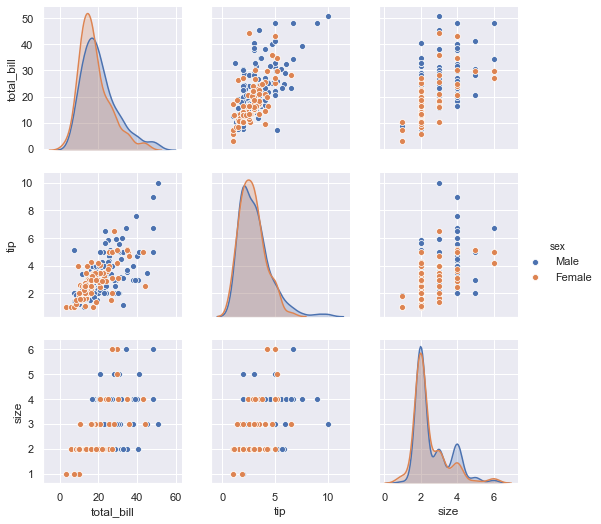

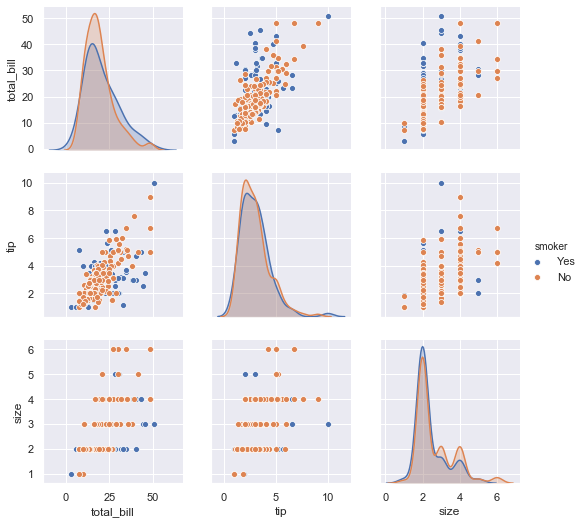

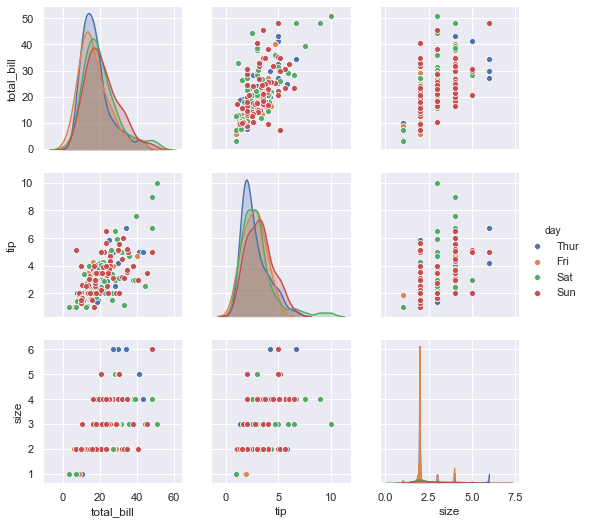

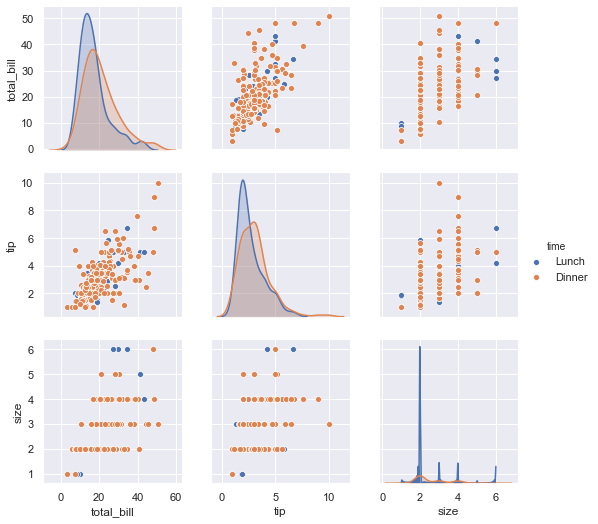

In [42]:
# Pairplots, mainly for quick error checking etc
sns.pairplot(df, hue = 'sex')
sns.pairplot(df, hue = 'smoker')
sns.pairplot(df, hue = 'day')
sns.pairplot(df, hue = 'time')

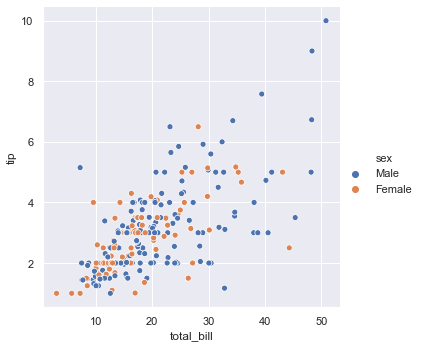

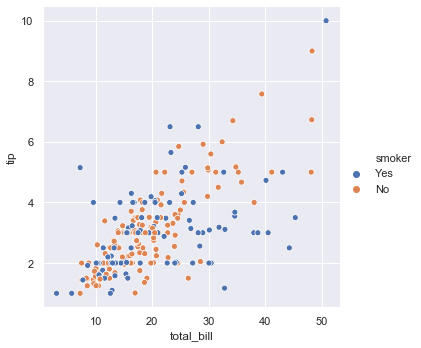

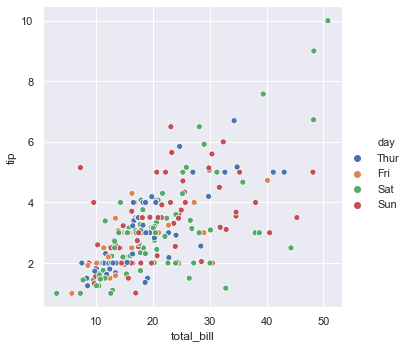

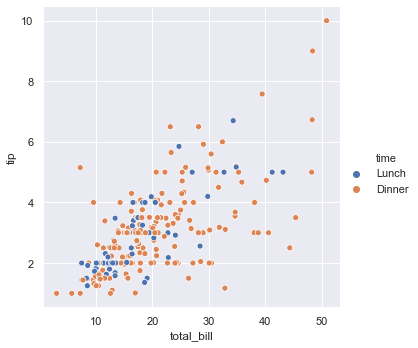

In [49]:
# Recreate as a facet grid
# Plots of the relationships for each column
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.relplot(x="total_bill", y="tip", hue="time", data=tips)

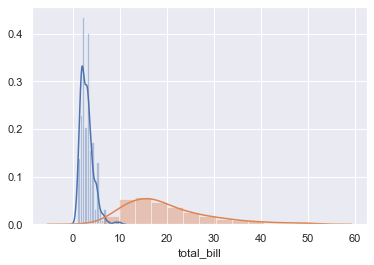

In [48]:
# Visualising the distribution of the numerical columns (total_bill and tip)
sns.distplot(df['tip'])
sns.distplot(df['total_bill'])

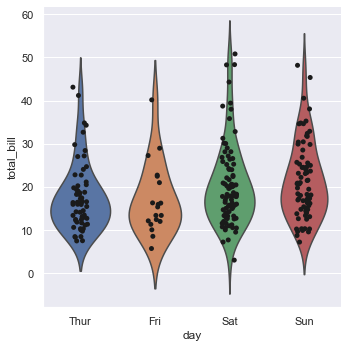

In [69]:
# Tweak style of swarm/strip
# Violin Plot with stripplot
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.stripplot(x="day", y="total_bill", color = "k", data=tips, ax=g.ax);

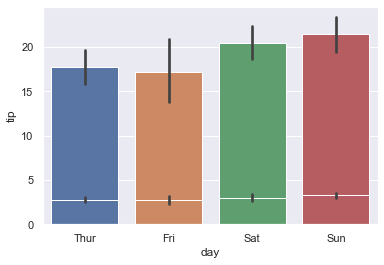

In [72]:
# Use catplot to add multiple
# Barplots of total bill and tip
sns.barplot(x="day", y="total_bill", data=tips) # Adjust colours to make tips more visible
sns.barplot(x="day", y="tip", data=tips)